<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(_3_2)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.2_n250.csv',
 'data_multi_delta_-3.2_n120.csv',
 'data_multi_delta_-3.2_n60.csv',
 'data_multi_delta_-3.2_n30.csv',
 'data_multi_delta_-3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,53.781076,47.672599,33.425988,64.805510,-0.000685,209.684488,209.685725,-0.001238
1,0.0,1.0,46.546392,85.658985,27.635211,69.457833,0.001145,239.299566,239.298307,0.001259
2,0.0,2.0,94.239197,32.762800,63.710046,60.237658,0.000908,260.950609,260.951053,-0.000444
3,0.0,3.0,38.213919,87.393387,20.475002,34.968302,-0.000279,191.050332,191.050234,0.000098
4,0.0,4.0,23.292204,84.443131,92.107239,36.039110,-0.000149,245.881536,245.880807,0.000729
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,55.508084,30.579195,61.058751,36.333415,0.004646,193.484090,193.480294,0.003796
29996,999.0,26.0,72.432152,57.475031,96.458061,80.587931,0.000550,316.953726,316.954620,-0.000894
29997,999.0,27.0,65.180592,64.314077,31.576895,74.478037,-0.000553,245.549048,245.549573,-0.000525
29998,999.0,28.0,43.378685,87.102886,67.702758,44.282346,0.000875,252.467550,252.467010,0.000540


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,53.781076,47.672599,33.425988,64.805510,-0.000685,209.684488,209.685725,-0.001238
1,0.0,1.0,46.546392,85.658985,27.635211,69.457833,0.001145,239.299566,239.298307,0.001259
2,0.0,2.0,94.239197,32.762800,63.710046,60.237658,0.000908,260.950609,260.951053,-0.000444
3,0.0,3.0,38.213919,87.393387,20.475002,34.968302,-0.000279,191.050332,191.050234,0.000098
4,0.0,4.0,23.292204,84.443131,92.107239,36.039110,-0.000149,245.881536,245.880807,0.000729
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,55.508084,30.579195,61.058751,36.333415,0.004646,193.484090,193.480294,0.003796
29996,999.0,26.0,72.432152,57.475031,96.458061,80.587931,0.000550,316.953726,316.954620,-0.000894
29997,999.0,27.0,65.180592,64.314077,31.576895,74.478037,-0.000553,245.549048,245.549573,-0.000525
29998,999.0,28.0,43.378685,87.102886,67.702758,44.282346,0.000875,252.467550,252.467010,0.000540


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    53.781076  47.672599  33.425988  64.805510 -0.000685  209.684488   
      1.0    46.546392  85.658985  27.635211  69.457833  0.001145  239.299566   
      2.0    94.239197  32.762800  63.710046  60.237658  0.000908  260.950609   
      3.0    38.213919  87.393387  20.475002  34.968302 -0.000279  191.050332   
      4.0    23.292204  84.443131  92.107239  36.039110 -0.000149  245.881536   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   55.508084  30.579195  61.058751  36.333415  0.004646  193.484090   
      26.0   72.432152  57.475031  96.458061  80.587931  0.000550  316.953726   
      27.0   65.180592  64.314077  31.576895  74.478037 -0.000553  245.549048   
      28.0   43.378685  87.102886  67.702758  44.282346  0.000875  252.467550   
      29.0   67.814798  39.489076  41.353629  43.551622  0.000732  202.209857   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    209.685725 -0.001238  
      1.0    239.298307  0.001259  
      2.0    260.951053 -0.000444  
      3.0    191.050234  0.000098  
      4.0    245.880807  0.000729  
...                 ...       ...  
999.0 25.0   193.480294  0.003796  
      26.0   316.954620 -0.000894  
      27.0   245.549573 -0.000525  
      28.0   252.467010  0.000540  
      29.0   202.209440  0.000417  

[30000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    53.781076  47.672599  33.425988  64.805510 -0.000685  209.684488   
      1.0    46.546392  85.658985  27.635211  69.457833  0.001145  239.299566   
      2.0    94.239197  32.762800  63.710046  60.237658  0.000908  260.950609   
      3.0    38.213919  87.393387  20.475002  34.968302 -0.000279  191.050332   
      4.0    23.292204  84.443131  92.107239  36.039110 -0.000149  245.881536   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   55.508084  30.579195  61.058751  36.333415  0.004646  193.484090   
      26.0   72.432152  57.475031  96.458061  80.587931  0.000550  316.953726   
      27.0   65.180592  64.314077  31.576895  74.478037 -0.000553  245.549048   
      28.0   43.378685  87.102886  67.702758  44.282346  0.000875  252.467550   
      29.0   67.814798  39.489076  41.353629  43.551622  0.000732  202.209857   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    209.685725 -0.001238  
      1.0    239.298307  0.001259  
      2.0    260.951053 -0.000444  
      3.0    191.050234  0.000098  
      4.0    245.880807  0.000729  
...                 ...       ...  
999.0 25.0   193.480294  0.003796  
      26.0   316.954620 -0.000894  
      27.0   245.549573 -0.000525  
      28.0   252.467010  0.000540  
      29.0   202.209440  0.000417  

[30000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,53.781076,47.672599,33.425988,64.805510,-0.000685,209.684488,209.685725,-0.001238
1,0.0,1.0,46.546392,85.658985,27.635211,69.457833,0.001145,239.299566,239.298307,0.001259
2,0.0,2.0,94.239197,32.762800,63.710046,60.237658,0.000908,260.950609,260.951053,-0.000444
3,0.0,3.0,38.213919,87.393387,20.475002,34.968302,-0.000279,191.050332,191.050234,0.000098
4,0.0,4.0,23.292204,84.443131,92.107239,36.039110,-0.000149,245.881536,245.880807,0.000729
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,55.508084,30.579195,61.058751,36.333415,0.004646,193.484090,193.480294,0.003796
29996,999.0,26.0,72.432152,57.475031,96.458061,80.587931,0.000550,316.953726,316.954620,-0.000894
29997,999.0,27.0,65.180592,64.314077,31.576895,74.478037,-0.000553,245.549048,245.549573,-0.000525
29998,999.0,28.0,43.378685,87.102886,67.702758,44.282346,0.000875,252.467550,252.467010,0.000540


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    53.781076  47.672599  33.425988  64.805510 -0.000685  209.684488   
      1.0    46.546392  85.658985  27.635211  69.457833  0.001145  239.299566   
      2.0    94.239197  32.762800  63.710046  60.237658  0.000908  260.950609   
      3.0    38.213919  87.393387  20.475002  34.968302 -0.000279  191.050332   
      4.0    23.292204  84.443131  92.107239  36.039110 -0.000149  245.881536   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   55.508084  30.579195  61.058751  36.333415  0.004646  193.484090   
      26.0   72.432152  57.475031  96.458061  80.587931  0.000550  316.953726   
      27.0   65.180592  64.314077  31.576895  74.478037 -0.000553  245.549048   
      28.0   43.378685  87.102886  67.702758  44.282346  0.000875  252.467550   
      29.0   67.814798  39.489076  41.353629  43.551622  0.000732  202.209857   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    209.685725 -0.001238  
      1.0    239.298307  0.001259  
      2.0    260.951053 -0.000444  
      3.0    191.050234  0.000098  
      4.0    245.880807  0.000729  
...                 ...       ...  
999.0 25.0   193.480294  0.003796  
      26.0   316.954620 -0.000894  
      27.0   245.549573 -0.000525  
      28.0   252.467010  0.000540  
      29.0   202.209440  0.000417  

[30000 rows x 8 columns]

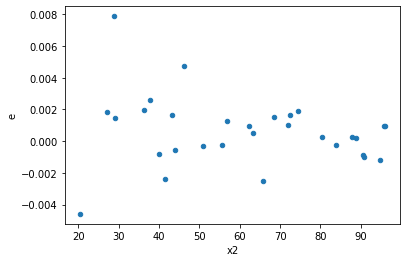

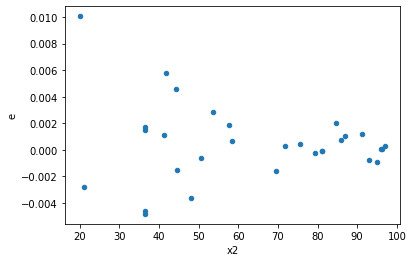

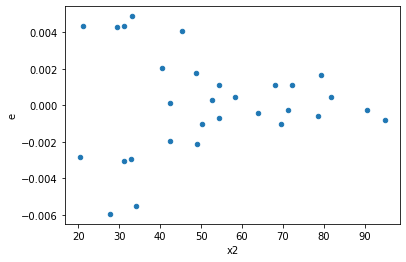

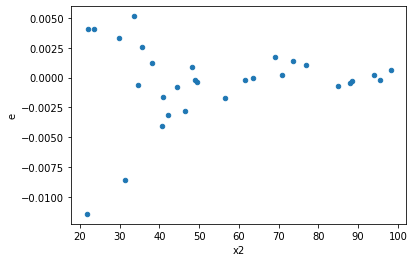

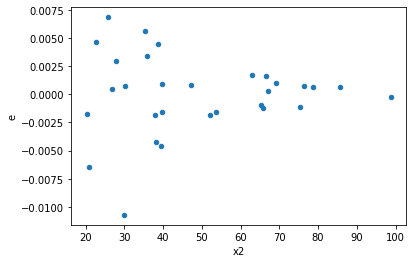

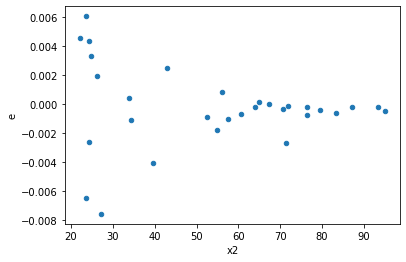

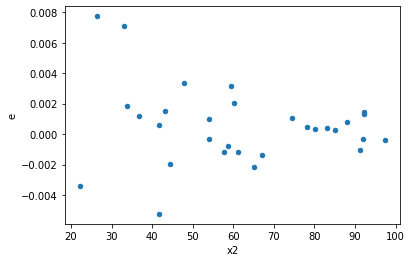

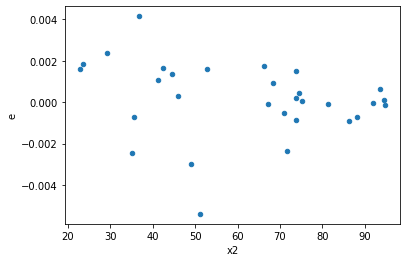

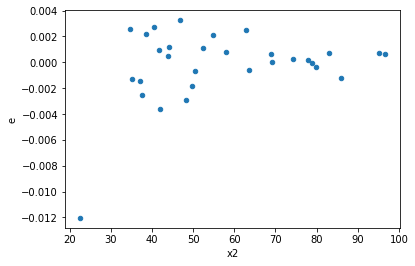

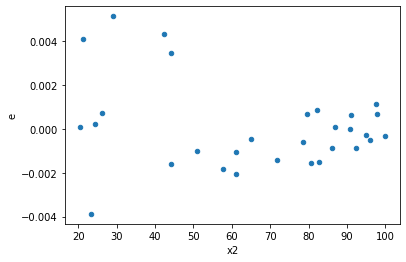

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
5.0,8.0,8.0,5.251787667637333e-05,0.00012883310838496812,6.564734584546666e-06,1.6104138548121015e-05,2.4531286590062655,0.22588985004477502,0.8870550749776125,0.11294492502238751,Reject005=1 : Homoscedasticity
9.0,8.0,8.0,4.227143974110412e-05,8.786138178778832e-05,5.283929967638015e-06,1.098267272347354e-05,2.0785045961506063,0.3209782667779719,0.839510866611014,0.16048913338898596,Reject005=1 : Homoscedasticity
20.0,8.0,8.0,1.5049180239404003e-05,2.832664991415202e-05,1.8811475299255004e-06,3.5408312392690024e-06,1.8822719552512879,0.38969210835803425,0.8051539458209829,0.19484605417901713,Reject005=1 : Homoscedasticity
46.0,8.0,8.0,7.146440626648126e-05,8.454569642102508e-05,8.933050783310158e-06,1.0568212052628135e-05,1.1830462301158065,0.8178644552222698,0.5910677723888651,0.4089322276111349,Reject005=1 : Homoscedasticity
53.0,8.0,8.0,1.5305123449237046e-05,1.713074115234836e-05,1.9131404311546307e-06,2.141342644043545e-06,1.1192814751979228,0.8772682106319967,0.5613658946840017,0.43863410531599833,Reject005=1 : Homoscedasticity
54.0,8.0,8.0,6.688757545211738e-05,8.772422661477184e-05,8.360946931514672e-06,1.096552832684648e-05,1.3115175131078078,0.7104922403211611,0.6447538798394195,0.35524612016058055,Reject005=1 : Homoscedasticity
63.0,8.0,8.0,1.6548224917704153e-05,1.8307907576003374e-05,2.068528114713019e-06,2.2884884470004217e-06,1.1063366413648765,0.8898469222607472,0.5550765388696264,0.4449234611303736,Reject005=1 : Homoscedasticity
75.0,8.0,8.0,3.5062381343332926e-05,7.541128650952707e-05,4.382797667916616e-06,9.426410813690884e-06,2.150774808222387,0.2993658434326534,0.8503170782836733,0.1496829217163267,Reject005=1 : Homoscedasticity
78.0,8.0,8.0,2.4089645083086094e-06,7.688475980147659e-06,3.011205635385762e-07,9.610594975184574e-07,3.1916103178896225,0.1209790147918326,0.9395104926040837,0.0604895073959163,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,8.0,0.00011620997887703567,4.420207876373806e-06,1.452624735962946e-05,5.525259845467257e-07,0.038036388261036724,0.00011543315941035017,Reject005=0 : Heteroscedasticity
1.0,8.0,8.0,8.921351349963413e-05,6.909087523225196e-06,1.1151689187454266e-05,8.636359404031495e-07,0.07744440558608344,0.0015650296554716994,Reject005=0 : Heteroscedasticity
2.0,8.0,8.0,4.150859725544165e-05,2.917395686541055e-05,5.188574656930207e-06,3.6467446081763186e-06,0.7028413098586687,0.6296787774358836,Reject005=1 : Homoscedasticity
3.0,8.0,8.0,2.1687748428395028e-05,1.2839090981198094e-05,2.7109685535493785e-06,1.6048863726497617e-06,0.5919974138204366,0.47477373530805245,Reject005=1 : Homoscedasticity
4.0,8.0,8.0,0.00025818332409589806,1.9524089604381903e-05,3.227291551198726e-05,2.440511200547738e-06,0.07562103274001536,0.0014381513443778153,Reject005=0 : Heteroscedasticity
5.0,8.0,8.0,5.251787667637333e-05,0.00012883310838496812,6.564734584546666e-06,1.6104138548121015e-05,2.4531286590062655,0.22588985004477502,Reject005=1 : Homoscedasticity
6.0,8.0,8.0,1.2463073623829199e-05,6.513790622101393e-06,1.5578842029786498e-06,8.142238277626741e-07,0.5226472071582028,0.3777342914714256,Reject005=1 : Homoscedasticity
7.0,8.0,8.0,6.962660598862281e-05,1.182039701052428e-05,8.703325748577851e-06,1.477549626315535e-06,0.16976839302573168,0.021491854405602973,Reject005=0 : Heteroscedasticity
8.0,8.0,8.0,5.009141717160227e-05,1.0717861248656116e-05,6.2614271464502835e-06,1.3397326560820145e-06,0.2139660216028439,0.04296388261108636,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      508
Reject005=0 : Heteroscedasticity    492
Name: Result_test, dtype: int64